In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
import pandas as pd

# Define the file path to your CSV file in the Resources folder
file_path = "Resources/lending_data.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Review the DataFrame
df.sample(5)  # Sample 5 random rows


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
59427,8000.0,6.544,42200,0.289100,2,0,12200,0
63806,10200.0,7.442,50600,0.407115,4,1,20600,0
25821,10600.0,7.625,52400,0.427481,5,1,22400,0
51736,9000.0,6.947,46000,0.347826,3,0,16000,0
564,9400.0,7.105,47500,0.368421,3,0,17500,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop("loan_status", axis=1)


In [8]:
# Review the y variable Series
y.sample(10)  # Sample 5 random values


24965    0
54047    0
36489    0
28669    0
14490    0
32126    0
1019     0
60980    0
42440    0
49652    0
Name: loan_status, dtype: int64

In [10]:
# Review the X variable DataFrame
X.sample(5)  # Sample 5 random rows


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
32936,8700.0,6.823,44800,0.330357,3,0,14800
15506,8800.0,6.848,45000,0.333333,3,0,15000
20180,11100.0,7.843,54400,0.448529,5,1,24400
49998,9200.0,7.050,46900,0.360341,3,0,16900
52427,8100.0,6.570,42400,0.292453,2,0,12400


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [11]:
# Check the balance of our target values
class_balance = y.value_counts() / len(y)


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [15]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.9521352751368186


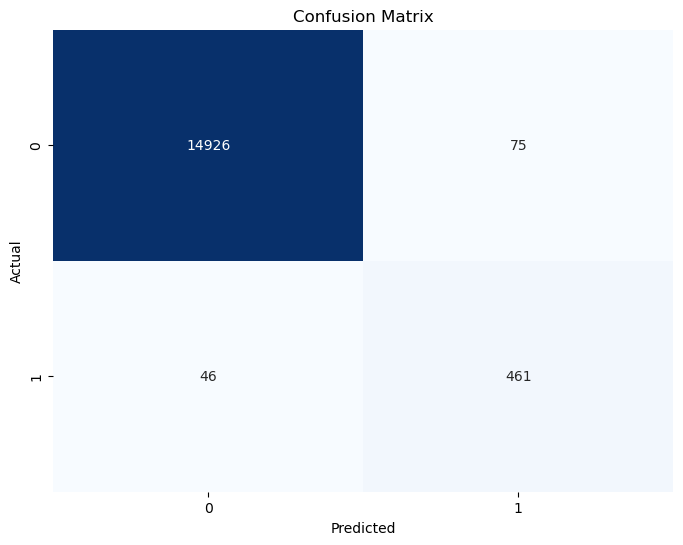

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a confusion matrix for the model
confusion = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Print the classification report for the model
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**  The model's performance for predicting high-risk loans is good but not perfect. It has a high precision and recall, meaning it correctly identifies a large portion of high-risk loans with a relatively low number of false positives. The F1-Score of 0.88 suggests a good balance between precision and recall for this class.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [22]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Resample the data to balance the labels
X_resampled, y_resampled = ros.fit_resample(X, y)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [23]:
# Count the distinct values of the resampled labels data
# Create a Pandas Series with the resampled labels
y_train_resampled_series = pd.Series(y_train_resampled)

# Count the distinct values (classes)
distinct_values = y_train_resampled_series.value_counts()

# Print the distinct values and their counts
print(distinct_values)

0    60035
1    60035
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [24]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logistic_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred_resampled = logistic_model_resampled.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print("Accuracy:", accuracy_resampled)

# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

Accuracy: 0.9942610265669332


In [27]:
# Generate a confusion matrix for the model
confusion_resampled = confusion_matrix(y_test, y_pred_resampled)
print("Confusion Matrix:")
print(confusion_resampled)

Confusion Matrix:
[[14915    86]
 [    3   504]]


In [28]:
# Print the classification report for the model
report_resampled = classification_report(y_test, y_pred_resampled)
print("Classification Report:")
print(report_resampled)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** For Label 0 (Healthy Loan):

Precision: 1.00 (100%)
Recall: 0.99 (99%)
F1-Score: 1.00 (100%)
The model's performance for predicting healthy loans is excellent. It achieves a high precision and recall, indicating that it correctly identifies most healthy loans while maintaining a low number of false negatives. The F1-Score of 1.00 suggests a very good balance between precision and recall for this class.

For Label 1 (High-Risk Loan):

Precision: 0.85 (85%)
Recall: 0.99 (99%)
F1-Score: 0.92 (92%)
The model's performance for predicting high-risk loans is also very good. It has a relatively high precision, meaning that it correctly identifies a substantial portion of high-risk loans with relatively few false positives. The high recall indicates that it captures almost all actual high-risk loans. The F1-Score of 0.92 suggests a good balance between precision and recall for this class.

Overall, the logistic regression model, fitted with oversampled data, performs exceptionally well for predicting both healthy loans and high-risk loans. It demonstrates high precision, recall, and F1-Score for both classes, indicating a robust ability to distinguish between the two classes. This suggests that the model is effective in assessing loan risk, and the oversampling has improved its performance on the minority class (high-risk loans).